In [1]:
import numpy as np
import pandas as pd

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('cars.csv')
data.head(2)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0


In [3]:
data.shape

(762091, 20)

In [4]:
data.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [5]:
data['price'].describe()

count    7.620910e+05
mean     3.648898e+04
std      1.984183e+06
min      1.000000e+00
25%      1.958300e+04
50%      2.798900e+04
75%      3.948800e+04
max      1.000000e+09
Name: price, dtype: float64

## Data Cleaning

cleaned columns: 
- price
- mileage
- exterior_color
- interior_color
- transmission
- fuel_type
- year 
- mgp
- drivetrain

- created another column 'tank size'


In [6]:
data['price'].sort_values(ascending=False)

188113    1.000000e+09
108142    1.000000e+09
188260    1.000000e+09
224571    8.888889e+06
84358     4.999999e+06
              ...     
584638    2.590000e+02
5658      1.000000e+00
13850     1.000000e+00
735177    1.000000e+00
660696    1.000000e+00
Name: price, Length: 762091, dtype: float64

In [7]:
# clean outlier prices, our dataset contains prices of 1 dollor and 100,000,000. These outliers will skew our results by large. So we decided to remove them
data = data[(data["price"]<data["price"].max()) & (data["price"] > 1.0)]

In [8]:
# remove seller_name
# We believe that the seller name has no effect on the price of the vehicle
data = data.drop(columns=['seller_name'], axis = 1)

In [9]:
# there are many outlier rows.
# 1119067 miles can drive around the earth 46627 times!
data['mileage'].sort_values(ascending=False)[:20]

756847    1119067.0
76422      999999.0
511961     999999.0
494409     999999.0
617503     974302.0
319941     938032.0
522994     915383.0
136180     777698.0
669643     769938.0
229883     763474.0
302334     754680.0
157346     724500.0
481170     680094.0
4896       668131.0
169278     662110.0
121155     653132.0
456962     644736.0
298512     638693.0
220225     620637.0
531797     566517.0
Name: mileage, dtype: float64

In [10]:
# delete the outliers (according to the Interquantile Range Outlier Detection method, outliers lie at >= 98% percentile)
percentile_98 = data['mileage'].quantile(0.98)
data = data[data['mileage'] <= percentile_98]

The **exterior_color** and **interior_color** has many unique color represenntations that are basically the same colors, including "gray", "grey", "silver", "metal", "metallic"... We cleaned them into main categories.

In [11]:
# clean extrior color

# categorize common color types
data['exterior_color_cleaned'] = data['exterior_color']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blk.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*bl.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*charcoal.*', 'black', case=False, regex=True)

# colors of gray
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*steel.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metal.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metallic.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*platinum.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grye.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silvr.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gry.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Titanium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SILV.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*sil.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*slate.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*lunar.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Magnesium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Granite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SIVER.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SLIVER.*', 'gray', case=False, regex=True)

# colors of white
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whiite.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*wt.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whi.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Wh.*', 'white', case=False, regex=True)

# colors of red
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*cherry.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*burgundy.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*maroon.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*garnet.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*amber.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Pomegranate.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGUN.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*MAROOON.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGAN.*', 'red', case=False, regex=True)


#colors of blue
# data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pearl.*', 'pearl', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*night.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blu.*', 'blue', case=False, regex=True)

# colors of green
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Turquoise.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*olive.*', 'green', case=False, regex=True)


# colors of yellow 
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*yellow.*', 'yellow', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*YELLLO.*', 'yellow', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Citrus.*', 'orange', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)

# colors of gold
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*champagne.*', 'gold', case=False, regex=True)

# colors of purple
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*violet.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*plum.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*berry.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Grape.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Velvet.*', 'purple', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pink.*', 'pink', case=False, regex=True)

colors_keep_exterior = ['black', 'gray', 'white', 'red', 'blue', 'green', 'yellow', 'orange', 'beige', 'brown', 'gold', 'purple', 'pink']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].where(data['exterior_color'].isin(colors_keep_exterior), 'other')


In [12]:
# clean interior color

# colors of black
data['interior_color_cleaned']= data['interior_color'] 
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Charcoal.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*BLK.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*onyx.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*balck.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Smoke.*', 'black', case=False, regex=True)

# colors of red
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Burgundy.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Maroon.*', 'red', case=False, regex=True)

# colors of gray
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Platinum.*', 'gray', case=False, regex=True)

# colors of white
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ivory.*', 'white', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)

# colors of beige
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*biege.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Cream.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Camel.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*tan.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Quartz.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Mocha.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*stone.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*neutral.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*sand.*', 'beige', case=False, regex=True)

# colors of blue
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)

# colors of purple
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Orchid.*', 'purple', case=False, regex=True)

# colors of brown
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Taupe.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Caramel.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*walnut.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Nougat.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Peanut Butter.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Espresso.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*saddle.*', 'brown', case=False, regex=True)

# colors of orange
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)

# colors of gold
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Champagne.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Bronze.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)

# colors of green
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)

colors_keep_interior = ['black', 'gray', 'white', 'red', 'beige', 'blue', 'purple', 'brown', 'orange', 'gold', 'green']
data['interior_color_cleaned']= data['interior_color_cleaned'].where(data['interior_color_cleaned'].isin(colors_keep_interior), 'other')

In [13]:
# convert transmission into automatic or manual types  transmission (automatic, manual, other is either na value or invalid input)

automatic_kw = "Automatic|A/T|Dual Shift Mode|dual clutch|auto|TipTronic|cvt|Power Glide|ivt|dct|evt|continuously variable"
manual_kw = "Manual|M/T|richmond 5 Speed|PDK"
data["transmission_cleaned"] = 0
data["transmission"].fillna("na", inplace = True)
data.loc[data["transmission"].str.contains(automatic_kw,case=False),"transmission_cleaned"] = "Automatic"
data.loc[data["transmission"].str.contains(manual_kw ,case=False),"transmission_cleaned"] = "Manual"
data.loc[data["transmission_cleaned"] == 0,"transmission_cleaned"] = "Other"

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/510378771.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["transmission"].fillna("na", inplace = True)
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/510378771.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Automatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["transmission"].str.contains(au

In [14]:
# get tank_size '..L' from engine
data["tank_size"] = data["engine"].str.extract(r'(\d+(\.\d+)?L)')[0]
data["tank_size"].fillna("naL",inplace = True)
data["tank_size"] = data["tank_size"].apply(lambda x: x.split("L")[0])
data["tank_size"] = data["tank_size"].apply(lambda x: float(x) if x != "na" else x)
data["tank_size"] = data[["tank_size"]].replace('na', np.nan)['tank_size']

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/3614169288.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["tank_size"].fillna("naL",inplace = True)
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/3614169288.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [15]:
# clean mpg data (list) to integer by extracting the minimum and maximum mpg, then finding the mean to fill the column
mgp_only = data[["mpg"]]
mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"
mgp_only = mgp_only["mpg"].str.split("-").apply(lambda x: [float(i) for i in x]).apply(lambda x: sum(x)/2)
data["mpg"] = mgp_only
data['mpg'].replace(0, np.nan,inplace = True)

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/1543450566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/1543450566.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mpg'].replace(0, np.nan,inplace

For column: 'year', we only keep the rows that have cars produced in or after 2000.

In [16]:
(data['year'] >= 2000).sum()

741009

In [17]:
rows_to_keep = data['year'][data['year'] >= 2000].index
data = data.loc[rows_to_keep]

Data Cleaning on fuel_type
- Flexible fuel vehicles (FFVs) have an internal combustion engine and are capable of operating on gasoline and any blend of gasoline and ethanol up to 83%
- E85 (or flex fuel) is a gasoline-ethanol blend containing 51% to 83% ethanol, depending on geography and season.

In [18]:
data['fuel_type'].isna().sum()

20836

In [19]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', nan, 'Premium', 'Electric',
       'Gasoline/Mild Electric Hybrid', 'Diesel', 'E85 Flex Fuel',
       'Flexible Fuel', 'Gasoline Fuel', 'Plug-In Hybrid',
       'Premium (Required)', 'Regular Unleaded', 'Compressed Natural Gas',
       'Other', 'Natural Gas', 'Flex Fuel Capability', 'Premium Unleaded',
       'Unspecified', 'Biodiesel', 'Bio Diesel', 'Diesel Fuel', 'Gaseous',
       'Hydrogen Fuel Cell', 'Gas', 'PHEV', 'Hybrid Fuel', 'Automatic',
       'Electric Fuel System', 'G', 'B', 'Gas/Electric Hybrid',
       'Flex Fuel', 'Plug-In Electric/Gas'], dtype=object)

In [20]:
"""categorize the fuel types into 'gasoline', 'hybrid', and 'electric' """
def categorize_fuel_type(fuel_type):
    if pd.isna(fuel_type) or fuel_type == 'unspecified':
        return None  # Keep NaN values as they are
    fuel_type = fuel_type.lower()
    if 'electric' in fuel_type and 'hybrid' not in fuel_type:
        return 'Electric'
    elif 'hybrid' in fuel_type or 'phev' in fuel_type or 'plug-in' in fuel_type:
        return 'Hybrid'
    # assume 'regular' means gasoline
    elif 'gasoline' in fuel_type or 'gas' in fuel_type or 'e85' in fuel_type or 'flex' in fuel_type or 'regular' in fuel_type:
        return 'Gasoline'
    elif 'bio diesel' in fuel_type or 'biodiesel' in fuel_type:
        return 'Biodiesel'
    elif 'diesel' in fuel_type:
        return 'Diesel'
    elif 'premium' in fuel_type: # could be premium 'gasoline' but we are distinguishing it since it can be different from regular gasoline
        return 'Premium'
    else: 
        return 'other' #return other types of fuel as 'other'

# Apply the function to the 'fuel_type' column
data['fuel_type'] = data['fuel_type'].apply(categorize_fuel_type)

In [21]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', None, 'Premium', 'Electric', 'Diesel',
       'other', 'Biodiesel'], dtype=object)

In [22]:
data['fuel_type'].isna().sum()

20836

For 'drivetrain':

In [23]:
data['drivetrain'].unique()

array(['Front-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', nan,
       'FWD', 'AWD', 'Four-wheel Drive', 'Unknown', 'RWD',
       'All-Wheel Drive', 'Front-Wheel Drive', 'Front Wheel Drive',
       'Four-Wheel Drive', '4WD', 'Rear-Wheel Drive', 'All Wheel Drive',
       'Rear Wheel Drive', 'Four Wheel Drive',
       'All-Wheel Drive with Locking and Limited-Slip Differential',
       'Front-Wheel Drive with Limited-Slip Differential',
       'Rear-Wheel Drive with Limited-Slip Differential',
       'Four-Wheel Drive with Locking and Limited-Slip Differential',
       'All-Wheel Drive with Locking Differential', '4x4',
       'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT',
       'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT',
       'Engine: 2.4L DOHC I4 GDI', 'Engine: 1.6L DOHC I4 GDI Turbo',
       'Engine: 1.6L 4-Cyl. 16-Valve MPI',
       'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT',
       'Four-Wheel Drive with Locking Differential', '4x2'], dtype=object)

#### Matching some unique drivetrains to specific car manufacturer and model (manually looked up from Google):
'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT': 2020 Kia Telluride models with standard **Front-wheel drive** function

'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT': 2020 & 2021 Kia Sportage LX --> **front-wheel-drive**

'Engine: 2.4L DOHC I4 GDI': 2020 Kia Optima LX --> **front-wheel-drive**

'Engine: 1.6L DOHC I4 GDI Turbo': 2020 Kia Optima EX Premium 4dr --> **front-wheel-drive**

'Engine: 1.6L 4-Cyl. 16-Valve MPI': 2022 Kia Rio S --> **front-wheel-drive**

'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT': 2021 Kia Forte LXS --> **front-wheel-drive**

In [24]:
# for the 1st specific engine:
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
418334,Kia,Telluride LX,2020,79989.0,NaN,Automatic,Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT,None,NaN,Snow White Pearl - SWP,...,0.0,4.9,4.8,214.0,NaN,27999.0,other,other,Automatic,NaN


In [25]:
# for the 2nd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
419745,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,...,0.0,4.9,4.8,179.0,NaN,19972.0,other,other,Automatic,NaN
420468,Kia,Sportage LX,2021,51289.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Burnished Copper,...,1.0,4.9,4.8,60.0,NaN,19972.0,other,other,Automatic,NaN
422105,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,...,0.0,4.9,4.8,179.0,NaN,19972.0,other,other,Automatic,NaN
423156,Kia,Sportage LX,2020,34871.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Clear White - UD,...,1.0,4.9,4.8,179.0,NaN,23999.0,other,other,Automatic,NaN
423365,Kia,Sportage LX,2020,20829.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Hyper Red,...,1.0,4.9,4.8,179.0,NaN,19972.0,other,other,Automatic,NaN


In [26]:
# for the 3rd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L DOHC I4 GDI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
429718,Kia,Optima LX,2020,35621.0,NaN,Automatic,Engine: 2.4L DOHC I4 GDI,None,NaN,Sparkling Silver - KCS,...,1.0,4.9,4.8,69.0,NaN,19468.0,other,other,Automatic,NaN


In [27]:
# for the 4th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L DOHC I4 GDI Turbo'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
431133,Kia,Optima EX Premium,2020,37752.0,NaN,AUTOMATIC,Engine: 1.6L DOHC I4 GDI Turbo,None,NaN,Snow White Pearl - SWP,...,1.0,4.9,4.8,69.0,NaN,22999.0,other,other,Automatic,NaN


In [28]:
# for the 5th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L 4-Cyl. 16-Valve MPI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
444217,Kia,Rio S,2022,5062.0,NaN,A,Engine: 1.6L 4-Cyl. 16-Valve MPI,Gasoline,NaN,Steel Gray - KLG,...,1.0,NaN,4.5,5.0,NaN,22995.0,other,other,Other,NaN


In [29]:
# for the 6th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,interior_color_cleaned,transmission_cleaned,tank_size
450192,Kia,Forte LXS,2021,10061.0,NaN,A,Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT,None,NaN,Clear White - UD,...,1.0,NaN,4.8,51.0,NaN,22995.0,other,other,Other,NaN


In [30]:
# Define a function to map the various drivetrain entries to main types or 'Other'
def clean_drivetrain(drive):
    drive = str(drive).lower()  # Convert to lower case for uniformity
    if 'front wheel' in drive or 'fwd' in drive or 'front-wheel' in drive:
        return 'Front Wheel Drive'
    elif 'all wheel' in drive or 'awd' in drive or '4wd' in drive or '4x4' in drive or 'all-wheel' in drive or '4X4' in drive:
        return 'All Wheel Drive'
    elif 'rear wheel' in drive or 'rwd' in drive or 'rear-wheel' in drive or '4x2' in drive:
        return 'Rear Wheel Drive'
    elif 'four wheel' in drive or 'four-wheel' in drive or '2wd' in drive:
        return 'Four Wheel Drive'
    elif 'engine' in drive:
        return 'Front Wheel Drive'
    else:
        return 'Other' #keep all other possible drive types as other

# Apply the function to the 'drivetrain' column
data['drivetrain'] =  data['drivetrain'].apply(clean_drivetrain)

# Let's check the unique values again to ensure our transformation is correct
data['drivetrain'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive',
       'Other', 'Four Wheel Drive'], dtype=object)

In [31]:
data.isna().mean()

manufacturer              0.000000
model                     0.000000
year                      0.000000
mileage                   0.000000
engine                    0.019402
transmission              0.000000
drivetrain                0.000000
fuel_type                 0.028118
mpg                       0.190716
exterior_color            0.011179
interior_color            0.072821
accidents_or_damage       0.030855
one_owner                 0.037749
personal_use_only         0.030981
seller_rating             0.275075
driver_rating             0.040116
driver_reviews_num        0.000000
price_drop                0.457415
price                     0.000000
exterior_color_cleaned    0.000000
interior_color_cleaned    0.000000
transmission_cleaned      0.000000
tank_size                 0.069033
dtype: float64

# EDA

## Univariate analysis

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### distribution of numerical features

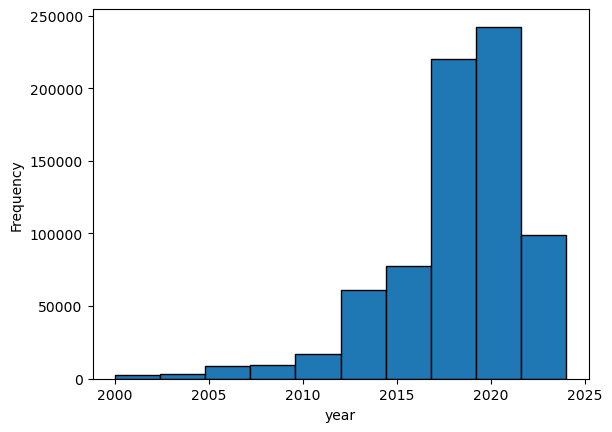

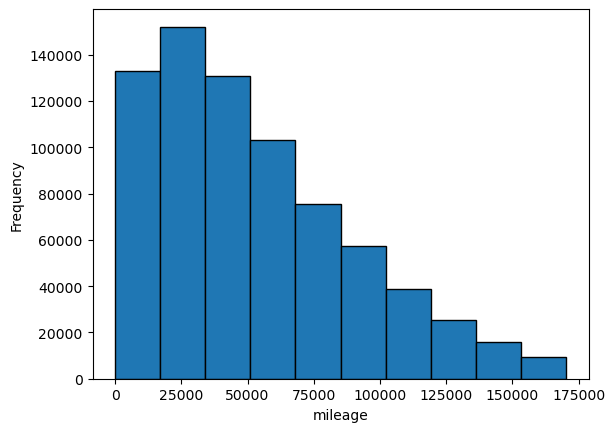

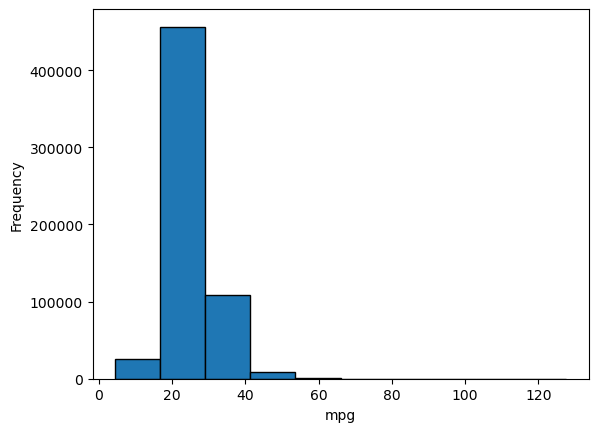

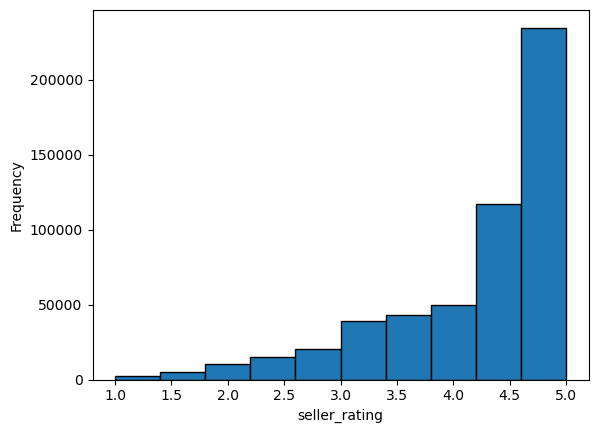

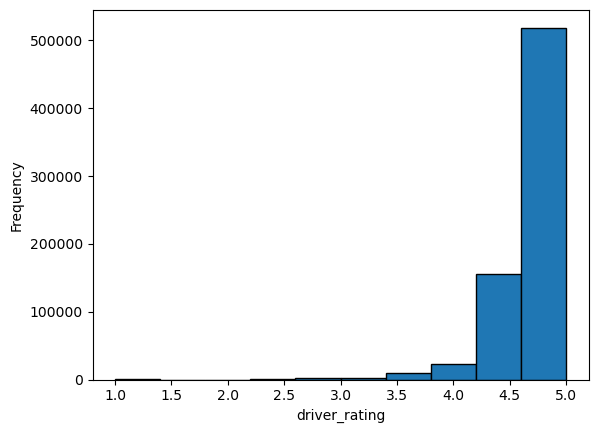

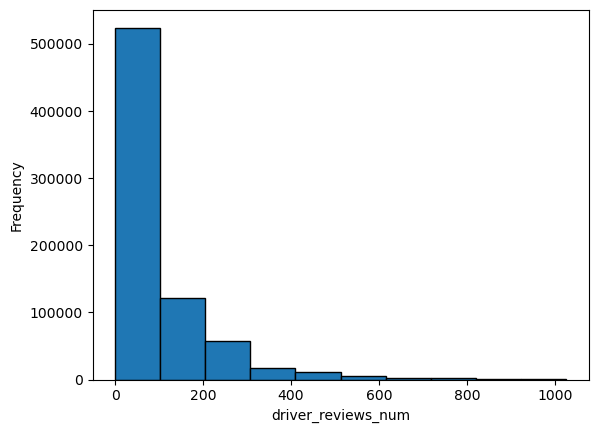

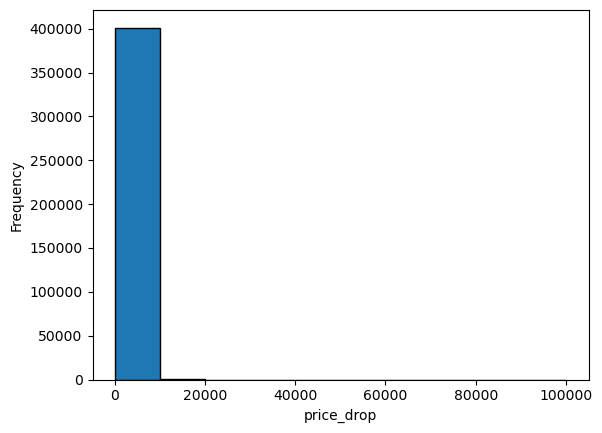

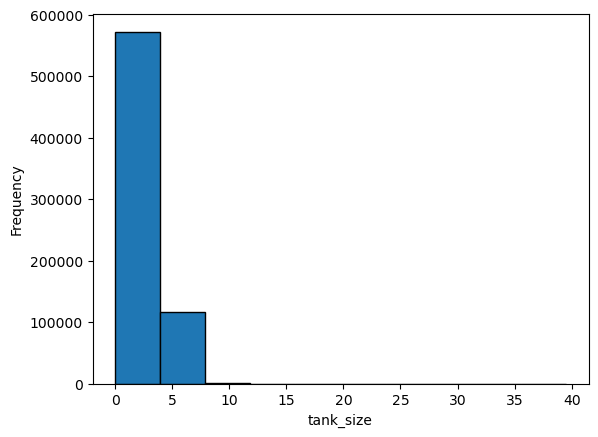

In [33]:
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.hist(data[col], edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 

In [34]:
## eda for initial categorical features
data.nunique()

manufacturer                  30
model                      10774
year                          25
mileage                   145661
engine                      5431
transmission                 935
drivetrain                     5
fuel_type                      7
mpg                          152
exterior_color              6991
interior_color              4431
accidents_or_damage            2
one_owner                      2
personal_use_only              2
seller_rating                 41
driver_rating                 31
driver_reviews_num           369
price_drop                  6386
price                      62719
exterior_color_cleaned        11
interior_color_cleaned        12
transmission_cleaned           3
tank_size                     68
dtype: int64

## bivariate analysis

### Price distribution for all the available binary categorical features:

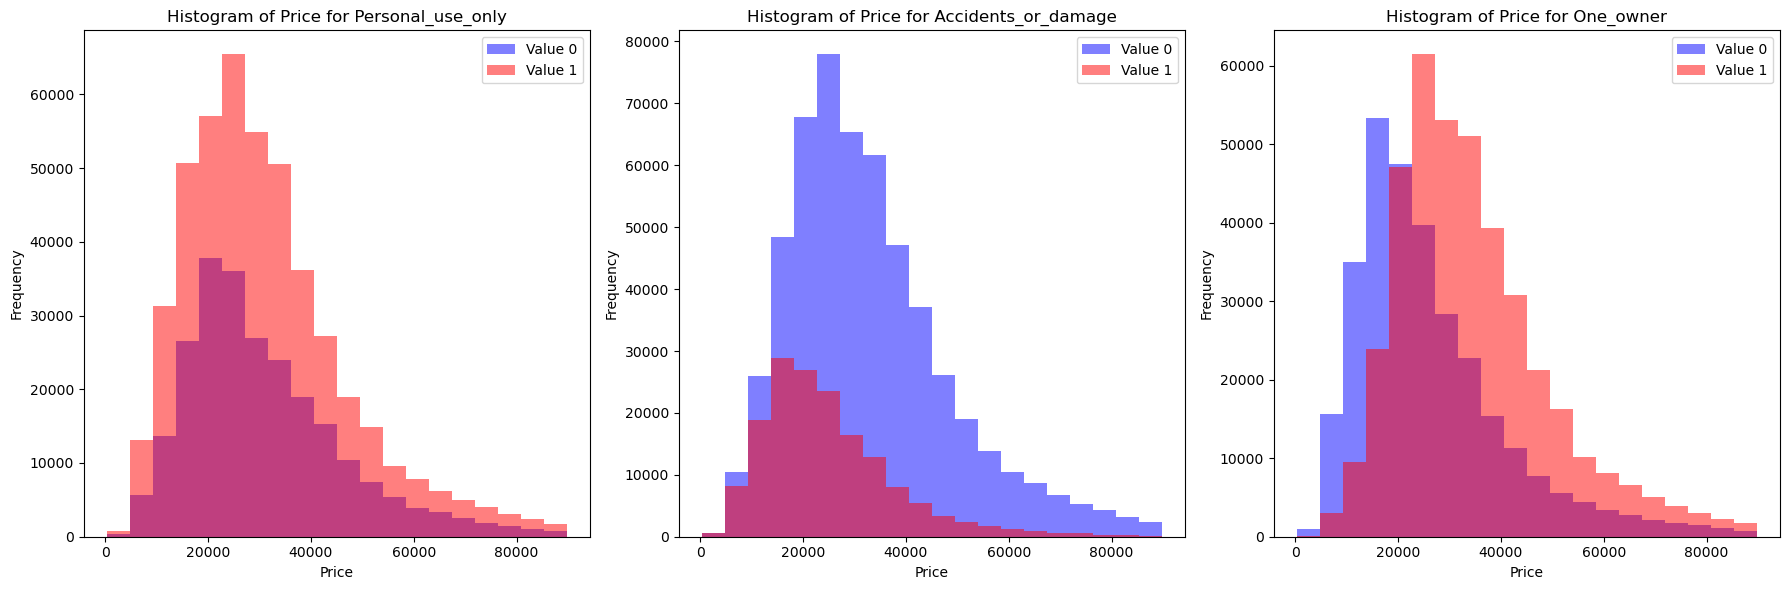

In [35]:
## EDA for binary(0,1) features
#for display purpose, we only show price within 95 percentile
copy = data.copy()
price_95_percentile = np.percentile(data['price'], 98)
copy = copy[copy["price"] < price_95_percentile]
binary_columns = ["personal_use_only", "accidents_or_damage", "one_owner"]
fig, axes = plt.subplots(1, len(binary_columns), figsize=(18, 6))
for idx, column in enumerate(binary_columns):  
    # for value 0
    axes[idx].hist(copy[copy[column] == 0]['price'], alpha=0.5, color='blue', label='Value 0', bins=20)
    # for value 1
    axes[idx].hist(copy[copy[column] == 1]['price'], alpha=0.5, color='red', label='Value 1', bins=20)
    # graph styling
    axes[idx].set_xlabel('Price')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of Price for {column.capitalize()}')
    axes[idx].legend()
plt.tight_layout()
plt.show()

### Price distribution for all the available numerical features:

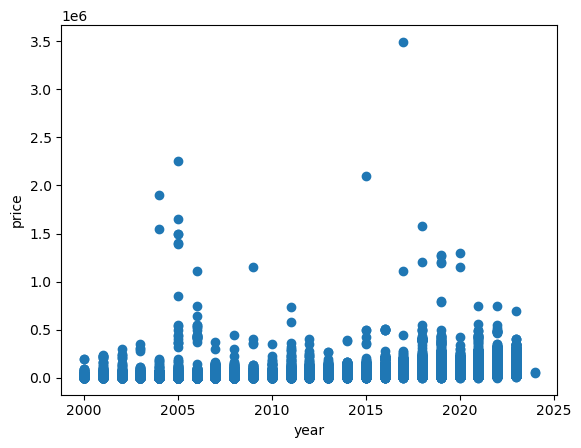

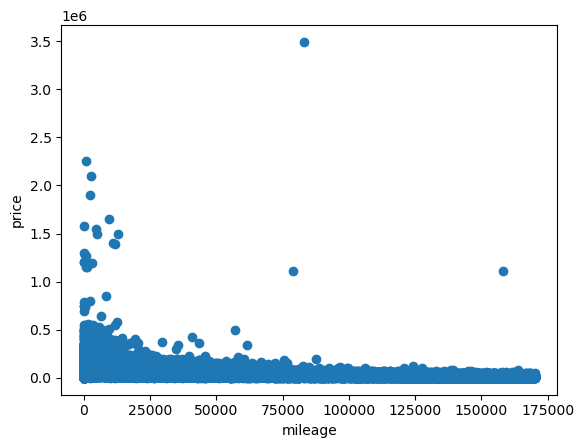

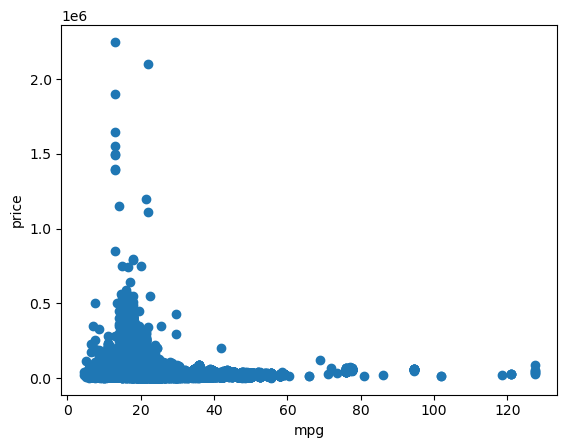

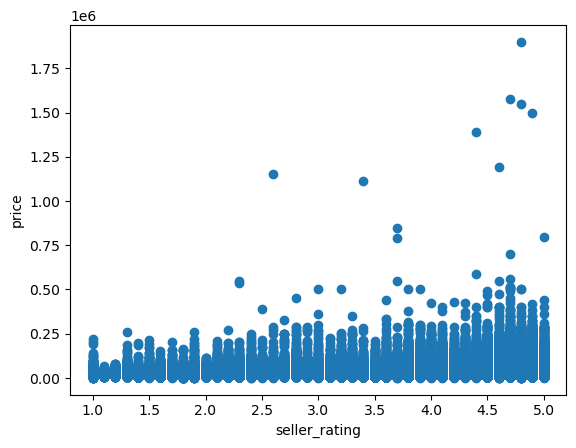

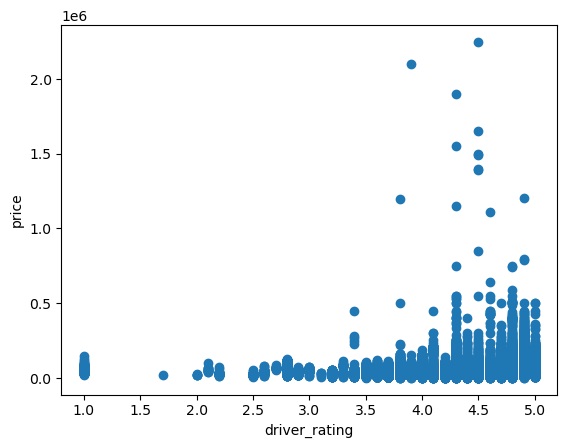

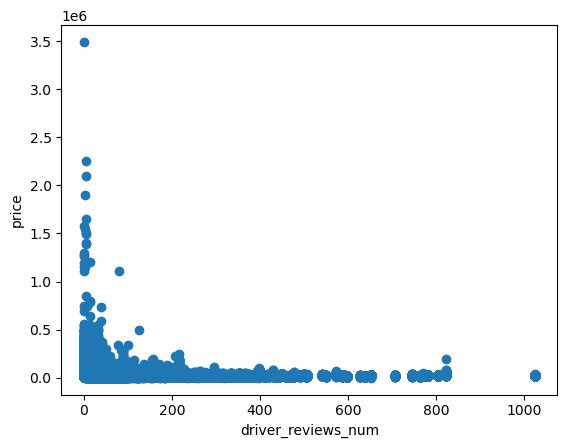

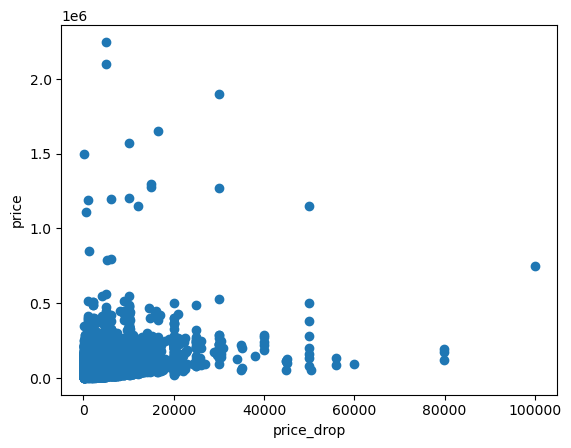

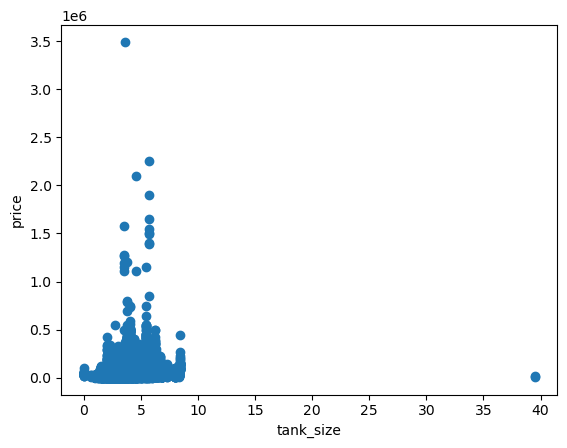

In [36]:
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.scatter(x=data[col], y=data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show() 

## Price distribution for all the available categorical features:

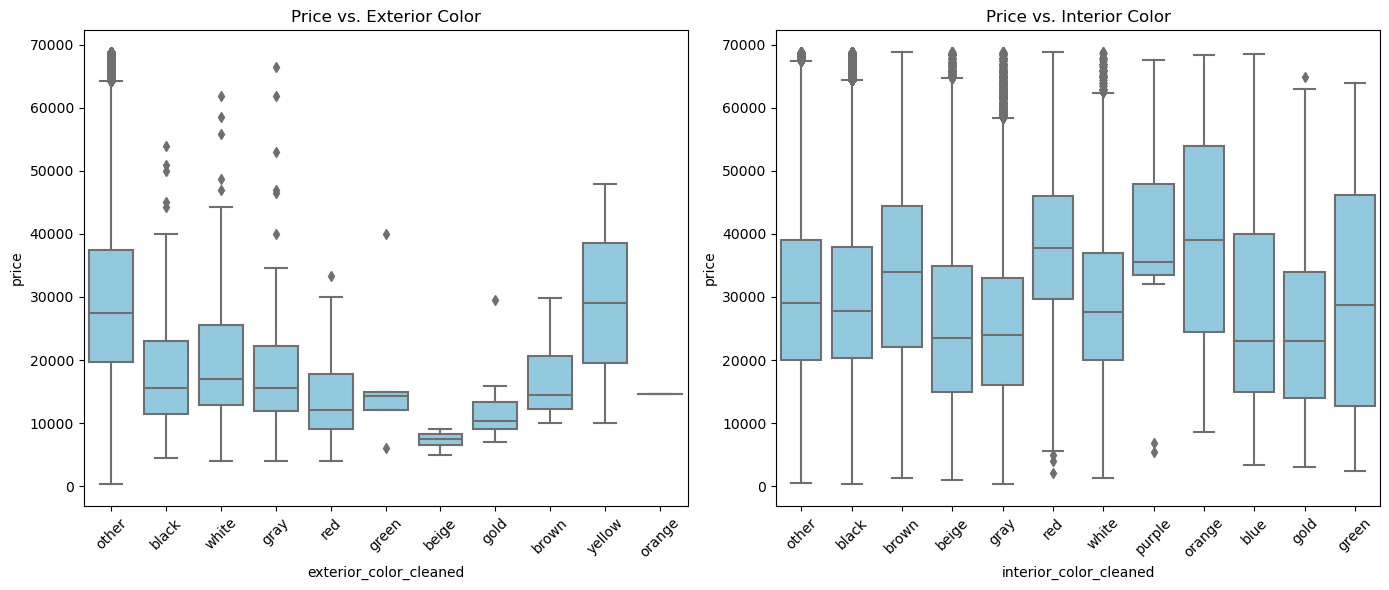

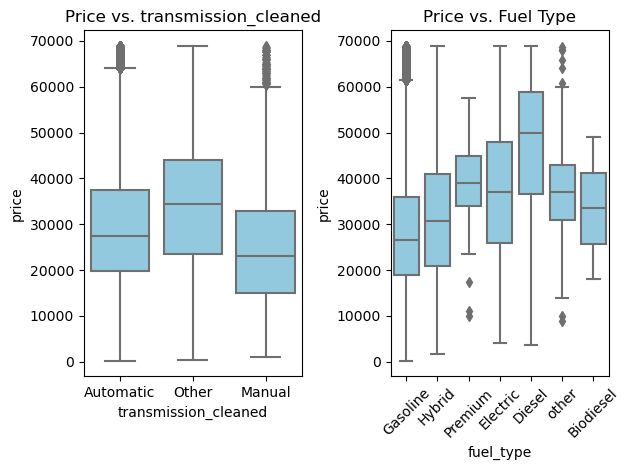

In [37]:
copy = data.copy()
percentile_95 = data['price'].quantile(0.95)
copy = copy[copy['price'] <= percentile_95]
plt.figure(figsize=(14, 6)) 
plt.subplot(1, 2, 1)
sns.boxplot(data=copy, x='exterior_color_cleaned', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Exterior Color')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=copy, x='interior_color_cleaned', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Interior Color')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.subplot(1, 2, 1)
sns.boxplot(data=copy, x='transmission_cleaned', y='price',width=0.8,color='skyblue')
plt.title('Price vs. transmission_cleaned')

plt.subplot(1, 2, 2)

sns.boxplot(data=copy, x='fuel_type', y='price', width=0.8,color='skyblue')
plt.title('Price vs. Fuel Type')
plt.xticks(rotation=45)

ticks = plt.gca().get_yticks()
plt.tight_layout()
plt.show()

## Multivariate Analysis

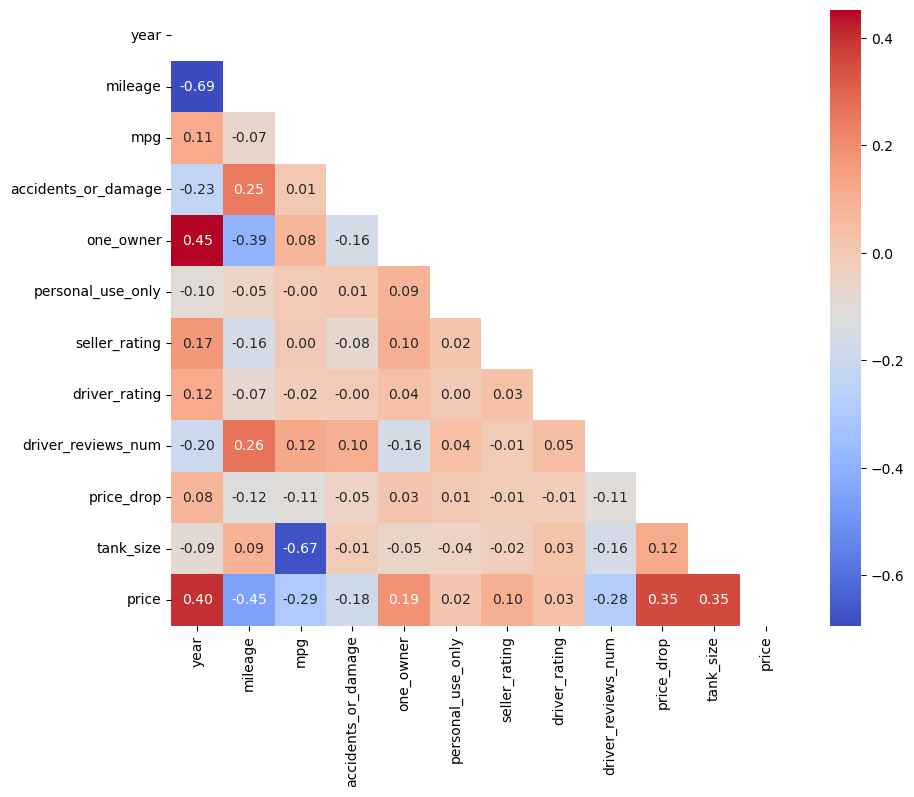

In [38]:
# correlation heatmap
copy = data.copy().drop(columns = ["price"])
copy["price"] = data["price"]
corr = copy.select_dtypes(['float', 'int']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Pre-Processing/Data Transformation

### create new features by taking the length of the description of the colors

In [39]:
exterior_color = data[["exterior_color"]]
# generate a column for the length of both 'exterior_color' and 'interior_color'
exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
# value is the length for non-null values, or 0 for null values
exterior_color = exterior_color["exterior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["exterior_color_length"] = exterior_color
interior_color = data[["interior_color"]]
# value is the length for non-null values, or 0 for null values
interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
interior_color = interior_color["interior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["interior_color_length"] = interior_color

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/2934321906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/2934321906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"


In [40]:
# create a column that calculates the time difference between now and 'year': the year when the car was produced
yearn = 2024 - data["year"]
data['year_from_2024'] = yearn

In [41]:
## check what columns have null values
data.isna().mean()

manufacturer              0.000000
model                     0.000000
year                      0.000000
mileage                   0.000000
engine                    0.019402
transmission              0.000000
drivetrain                0.000000
fuel_type                 0.028118
mpg                       0.190716
exterior_color            0.011179
interior_color            0.072821
accidents_or_damage       0.030855
one_owner                 0.037749
personal_use_only         0.030981
seller_rating             0.275075
driver_rating             0.040116
driver_reviews_num        0.000000
price_drop                0.457415
price                     0.000000
exterior_color_cleaned    0.000000
interior_color_cleaned    0.000000
transmission_cleaned      0.000000
tank_size                 0.069033
exterior_color_length     0.000000
interior_color_length     0.000000
year_from_2024            0.000000
dtype: float64

In [42]:
# impute quantitative data by distribution

def quantitative_distribution(col, N):
    cleaned_col = col.dropna()
    hist, edges = np.histogram(cleaned_col, bins=10, density=True)
    bin_probs = hist * np.diff(edges)
    output = []
    for i in range(N):
        index = np.random.choice(range(10), p=bin_probs)
        bin_min, bin_max = edges[index], edges[index+1]
        output.append(np.random.uniform(bin_min, bin_max))
        # print(output)
    return np.array(output)

def impute_height_quant(col):
    missing = col.isnull()
    missing_idx = missing[missing].index

    imputed_values = quantitative_distribution(col.dropna(), missing.sum())
    output = col.copy()
    output.loc[missing_idx] = imputed_values
    return output

In [43]:
imputed_price_drop = impute_height_quant(data['price_drop'])
data['price_drop'] = imputed_price_drop

imputed_mpg = impute_height_quant(data['mpg'])
data['mpg'] = imputed_mpg

imputed_seller = impute_height_quant(data['seller_rating'])
data['seller_rating'] = imputed_seller

imputed_driver = impute_height_quant(data['driver_rating'])
data['driver_rating'] = imputed_driver

imputed_tank = impute_height_quant(data['tank_size'])
data['tank_size'] = imputed_tank

In [44]:
data_copy = data.copy()
def impute_with_probabilistic_distribution(column):
    # Get the non-missing values and their frequencies
    values, counts = np.unique(column.dropna(), return_counts=True)
    # Calculate probabilities for each value
    probabilities = counts / counts.sum()
    # Generate random values based on the distribution for the missing values
    imputed_values = np.random.choice(values, size=column.isna().sum(), p=probabilities)
    # Assign the generated values to the missing values
    column.loc[column.isna()] = imputed_values
    return column
data['fuel_type'] = impute_with_probabilistic_distribution(data_copy['fuel_type'])
data["personal_use_only"] = impute_with_probabilistic_distribution(data_copy['personal_use_only'])
data["accidents_or_damage"] = impute_with_probabilistic_distribution(data_copy['accidents_or_damage'])
data["one_owner"] = impute_with_probabilistic_distribution(data_copy['one_owner'])

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/2475188858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.isna()] = imputed_values
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/2475188858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.isna()] = imputed_values
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_79247/2475188858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [45]:
data.reset_index(drop = True, inplace = True)

In [46]:
# Specify columns to encode
columns_to_encode = [
    'interior_color_cleaned', 
    'exterior_color_cleaned', 
    'transmission_cleaned', 
    'manufacturer', 
    'drivetrain', 
    'fuel_type',
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the data
# The drop='first' parameter is used to avoid the dummy variable trap by dropping one category per feature
encoded_data = encoder.fit_transform(data[columns_to_encode])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Drop the original columns from the cleaned dataframe and add the new one-hot encoded columns
cars_cleaned_df = data.drop(columns=columns_to_encode)
cars_encoded_df = pd.concat([cars_cleaned_df, encoded_df], axis=1)

cars_encoded_df


/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,model,year,mileage,engine,transmission,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,drivetrain_Four Wheel Drive,drivetrain_Front Wheel Drive,drivetrain_Other,drivetrain_Rear Wheel Drive,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Premium,fuel_type_other
0,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,38.500000,Black,Parchment,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.500000,Gray,Ebony,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.500000,Bellanova White Pearl,Ebony,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.500000,Polished Metal Metallic,NaN,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,38.500000,NaN,Ebony,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741004,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,29.000000,Bright Silver Metallic,Blond,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741005,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,18.414489,Red,Beige,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741006,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,25.500000,Ice White,Soft Beige,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741007,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,24.500000,Ice White,Off Black,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Predictive Task

Identify a predictive task based on your dataset 
- Regression or classification?

Describe the task: 
- how to evaluate different predictive models (e.g. accuracy, f1); 
- what baseline models to compare with, why? 
- why our model(s) outperform them
Summary: compare various models


In [47]:
'''reset default pandas view in notebook output'''
# pd.reset_option('display.max_columns')
'''show all pandas columns in notebook output'''
pd.options.display.max_columns = None

In [48]:
cars_encoded_df.isnull().mean()[cars_encoded_df.isnull().mean() != 0]

engine            0.019402
exterior_color    0.011179
interior_color    0.072821
dtype: float64

In [49]:
X = cars_encoded_df.drop(columns=['engine', 'model', 'transmission', 'exterior_color', 'interior_color', 'price'], axis = 1)
Y = cars_encoded_df["price"]

In [50]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y, test_size=0.4,random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [51]:
y_train.mean(),y_eval.mean(), y_test.mean()

(32913.293649419145, 32832.65219767614, 32844.55793444083)

In [52]:
# baseline model: median and linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
regr = LinearRegression()
regr.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, regr.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, regr.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, regr.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 16754.454631859964,
 'eval': 15807.008266689041,
 'test': 16442.540007259835}

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

ridge = Ridge()

# grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

train_accuracy = math.sqrt(mean_squared_error(y_train, ridge_best.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, ridge_best.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, ridge_best.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}
## hyperparameters alpha = 10

/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96355e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96544e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96498e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96501e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/vickyli/anaconda3/lib/pyt

{'train': 16754.57329722164,
 'eval': 15807.068794551924,
 'test': 16442.73469241065}

In [54]:
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.01, 0.1, 1, 10]}

lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs = 5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, lasso_best.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, lasso_best.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}
## hyperparameter: 0.1

/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pand

{'train': 16754.506358898445,
 'eval': 15806.863965551596,
 'test': 16442.53116678432}

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300)
rf.fit(X_train, y_train)

train_accuracy = math.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, rf.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 11261.646074444556,
 'eval': 10695.07505265405,
 'test': 11263.91856987008}

In [56]:
from sklearn import ensemble
import math

hisgrad = ensemble.HistGradientBoostingRegressor()
hisgrad.fit(X_train, y_train)

train_accuracy = math.sqrt(mean_squared_error(y_train, hisgrad .predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, hisgrad.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, hisgrad.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 10454.754486672055,
 'eval': 9945.345059297873,
 'test': 10517.383677339802}

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
regressor = HistGradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    "max_bins": [100, 150, 255]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parametersloss="squared_error",
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/vickyli/anaconda3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vickyli/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed

Best parameters: {'learning_rate': 0.2, 'max_bins': 150, 'max_depth': 7, 'max_iter': 300}


In [58]:
hgb_best = HistGradientBoostingRegressor(**best_params)
hgb_best.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, hgb_best .predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, hgb_best.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, hgb_best.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 9327.479557120885,
 'eval': 9270.270813077585,
 'test': 9686.974536915754}

In [59]:
from sklearn import ensemble
import math

hisgrad = ensemble.HistGradientBoostingRegressor(loss="squared_error",
    learning_rate=0.2,
    max_iter=300,
    max_leaf_nodes=30,
    max_depth= 7,
    min_samples_leaf=20,
    random_state = 42                                                
)
hisgrad.fit(X_train, y_train)
train_accuracy = math.sqrt(mean_squared_error(y_train, hisgrad .predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, hisgrad.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, hisgrad.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 8999.565596050625,
 'eval': 9139.25813063752,
 'test': 9571.286972610054}

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Calculate cross-validated RMSE scores
scores = cross_val_score(hgb_best, X_train, y_train, cv=5, scoring=rmse_scorer, n_jobs=5)

# Since the scores are negative, take the absolute value to get the actual RMSE scores
rmse_scores = np.abs(scores)

print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

RMSE scores: [14956.46975621 10728.64525094 10125.49700909  8871.40337454
  9122.84078294]
Mean RMSE: 10760.971234743953


In [61]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
import xgboost as xgb
import xgboost as XGBRegressor
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train,verbose = False)
train_accuracy = math.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, xgb.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

#sign of overfitting


{'train': 7189.449203683544,
 'eval': 9322.238118175213,
 'test': 9361.821859614884}

To address overfitting:

In [63]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xgb_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters 
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
import xgboost as xgb
import xgboost as XGBRegressor
train_accuracy = math.sqrt(mean_squared_error(y_train, best_xgb_model.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, best_xgb_model.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, best_xgb_model.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 5212.696495245737,
 'eval': 8001.220243354916,
 'test': 8162.20935758276}

In [65]:
import xgboost as xgb
import xgboost as XGBRegressor
xgb = xgb.XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 7, n_estimators=300,subsample = 0.8, eta = 0.1)
xgb.fit(X_train, y_train,verbose = False)
train_accuracy = math.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
eval_accuracy = math.sqrt(mean_squared_error(y_eval, xgb.predict(X_eval)))
test_accuracy = math.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
{"train": train_accuracy,
"eval": eval_accuracy,
"test": test_accuracy}

{'train': 7361.626754712891,
 'eval': 8766.013605366283,
 'test': 9008.950809165575}

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Custom scorer for RMSE
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Calculate cross-validated RMSE scores
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring=rmse_scorer, n_jobs=5)

# Since the scores are negative, take the absolute value to get the actual RMSE scores
rmse_scores = np.abs(scores)

print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

RMSE scores: [14977.07372812  9655.71486846 10145.45255567  8228.13193573
  8545.43399251]
Mean RMSE: 10310.36141609621


## Conclusion

In [67]:
features = {}
index = 0
x = xgb.feature_importances_
for i in X_train.columns:
    features[i] = x[index]
    index += 1
dict(sorted(features.items(), key=lambda item: item[1]))

{'interior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_black': 0.0,
 'exterior_color_cleaned_brown': 0.0,
 'exterior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_gray': 0.0,
 'exterior_color_cleaned_green': 0.0,
 'exterior_color_cleaned_orange': 0.0,
 'exterior_color_cleaned_red': 0.0,
 'fuel_type_Premium': 0.0,
 'exterior_color_cleaned_yellow': 0.00015056162,
 'interior_color_cleaned_other': 0.0011547955,
 'fuel_type_other': 0.0022381097,
 'interior_color_cleaned_brown': 0.0022949092,
 'manufacturer_Jaguar': 0.002299725,
 'interior_color_cleaned_orange': 0.002424556,
 'interior_color_cleaned_purple': 0.0024338814,
 'manufacturer_Buick': 0.0024348265,
 'exterior_color_length': 0.0024596467,
 'interior_color_cleaned_white': 0.002628823,
 'manufacturer_Mazda': 0.0031002779,
 'manufacturer_Chrysler': 0.0032099043,
 'interior_color_cleaned_blue': 0.0033243056,
 'interior_color_cleaned_black': 0.0033301536,
 'manufacturer_GMC': 0.00346223,
 'interior_color_cleaned_gray': 0.0035

In [68]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=0)
perm_importance['importances_mean']
features = {}
index = 0
x = perm_importance['importances_mean']
for i in X_train.columns:
    features[i] = x[index]
    index += 1
dict(sorted(features.items(), key=lambda item: item[1]))

{'interior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_black': 0.0,
 'exterior_color_cleaned_brown': 0.0,
 'exterior_color_cleaned_gold': 0.0,
 'exterior_color_cleaned_gray': 0.0,
 'exterior_color_cleaned_green': 0.0,
 'exterior_color_cleaned_orange': 0.0,
 'exterior_color_cleaned_red': 0.0,
 'exterior_color_cleaned_yellow': 0.0,
 'fuel_type_Premium': 0.0,
 'interior_color_cleaned_purple': 1.557411760721994e-06,
 'exterior_color_cleaned_white': 1.9667471112927435e-06,
 'exterior_color_cleaned_other': 2.1685686803496473e-06,
 'interior_color_cleaned_green': 1.7545209203018165e-05,
 'fuel_type_other': 3.692286110847931e-05,
 'interior_color_cleaned_other': 5.2255941379331096e-05,
 'interior_color_cleaned_orange': 7.449543789344038e-05,
 'interior_color_cleaned_white': 0.00013334481969369262,
 'manufacturer_Jaguar': 0.00014070144790850891,
 'interior_color_cleaned_blue': 0.00032846341163972337,
 'interior_color_cleaned_brown': 0.00033574137890171054,
 'manufacturer_Buick': 0.000344